<a href="https://colab.research.google.com/github/ihyaulumuddin044/portofolio_data_analyst/blob/main/sales_analisis/market_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS DATA SUPERMARKET (KAGGLE DATASET)**


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd

path = pd.read_csv("/content/drive/My Drive/Dataset_Latihan/minimarket_dataset/dataset.csv")

data = path

data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# DATA PREPARATION

In [36]:
# melihat nilai null pada data set

null_values = data.isnull().sum()
null_values

null_columns = null_values[null_values > 0]
print("Kolom dengan nilai null:")
print(null_columns)

Kolom dengan nilai null:
Series([], dtype: int64)


pada data kita bisa melihat bahwa data sudah aman dari dari nilai kosong

selanjutnya kita akan melihat apakah ada data duplikat

In [37]:
duplicate = data.duplicated().sum()
duplicate

0

bisa kita lihat bahwa dataset telah bersih dan sudah dapat di gunakan dengan untuk analisa

In [38]:
data['Date'] = pd.to_datetime(data['Date'])

In [39]:
data['Day_of_Week'] = data['Date'].dt.day_name()

In [40]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day_of_Week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,Tuesday
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,Saturday
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,Saturday
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,Friday


In [41]:
#  data pembeliah berdasarkan waktu pembelian (pagi, siang,sore-malam)
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.time

data['Period'] = data['Time'].apply(lambda x: 'Pagi' if x < pd.to_datetime('09:00').time() else ('Siang' if x < pd.to_datetime('17:00').time() else 'Malam'))

In [42]:
# Harga total

data['Total'] = data['Unit price'] * data['Quantity']


In [43]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day_of_Week,Period
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,522.83,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,Siang
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,76.40,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,Siang
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,324.31,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,Siang
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,465.76,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,Malam
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,604.17,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,Siang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,40.35,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,Tuesday,Siang
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,973.80,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,Saturday,Malam
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,31.84,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7,Saturday,Siang
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,65.82,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1,Friday,Siang


# ANALISIS DATA

di sini kita akan menganalis informasi yang penting dan memiliki hubungan yang dapat memberikan informasi mengenain produk yang paling banyak di beli, jenis kelamin konsumen yang lebih dominan dan waktu pembelian yang sering terjadi dan lain-lain

1. Total jumlah konsumen berdasarkan gender


In [46]:
consumers_per_gender = data.groupby('Gender')['Invoice ID'].nunique()

print(consumers_per_gender)

Gender
Female    501
Male      499
Name: Invoice ID, dtype: int64


visualisasi data gender

<ipython-input-53-f8bfcfe0c96f>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, total_consumer_count[i] + 0.5, str(total_consumer_count[i]), ha='center')


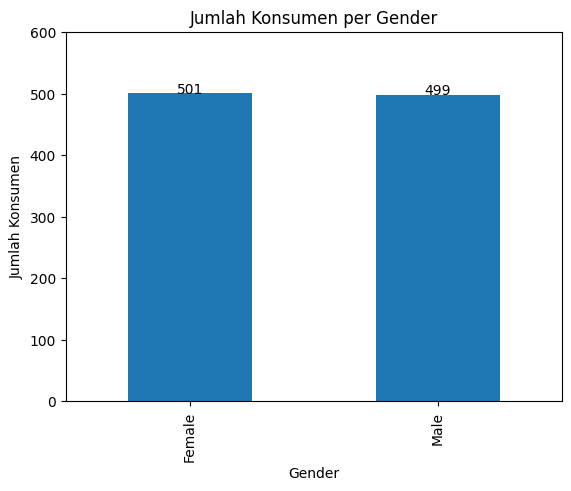

In [53]:
# Membuat visualisasi jumlah konsumen berdasarkan gender
import matplotlib.pyplot as plt


total_consumer_count = data['Gender'].value_counts()

ax = total_consumer_count.plot(kind='bar', title='Jumlah Konsumen per Gender')
for i in range(len(total_consumer_count)):
    ax.text(i, total_consumer_count[i] + 0.5, str(total_consumer_count[i]), ha='center')
plt.ylim(0, total_consumer_count.max() + 100)
plt.ylabel('Jumlah Konsumen')
plt.xlabel('Gender')
plt.show()


pada data tersebut bisa kita lihat bahwa perbandingan konsumen berdasarkan gender. wanita memiliki jumlah terbesar dalam dataset tersebut

2. perbandingan produk yang di beli oleh pria vs wanita

In [58]:
# data di dalam product line
product_lines = data['Product line'].unique()

print(product_lines)

# jumlah product yang terjual berdasarkan kelas
product_line_counts = data['Product line'].value_counts()

print(product_line_counts)


['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64


kelas produk yanng di beli dan kaitannya dengan gender

Gender                  Female  Male
Product line                        
Electronic accessories      84    86
Fashion accessories         96    82
Food and beverages          90    84
Health and beauty           64    88
Home and lifestyle          79    81
Sports and travel           88    78


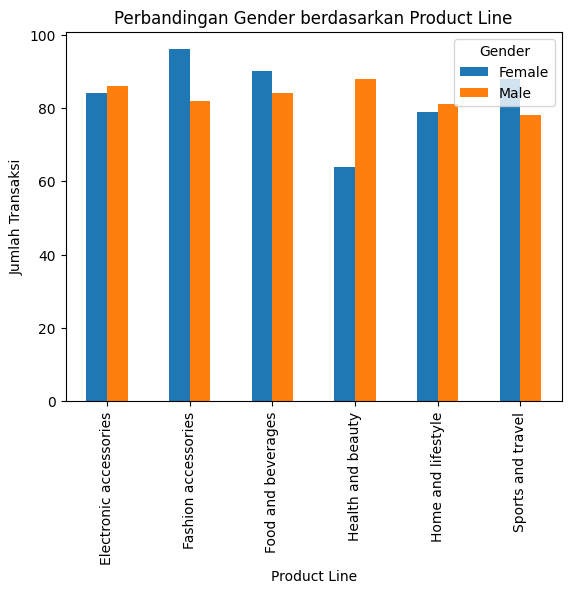

In [62]:

gender_product_line = data.groupby(['Product line', 'Gender']).size().unstack()

print(gender_product_line)
gender_product_line.plot(kind='bar', stacked=False, title='Perbandingan Gender berdasarkan Product Line')
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Product Line')
plt.show()


dari data tersebut kita bisa melihat informasi bahwa memang wanita banyak mendominasi dalam data penjualan di supermarket tersebut. tetapi pria mendominasi dalam kesehatan dan kecantikan juga perlengkapan rumah dan gaya hidup

Rata-rata rating dari setiap kelas produk

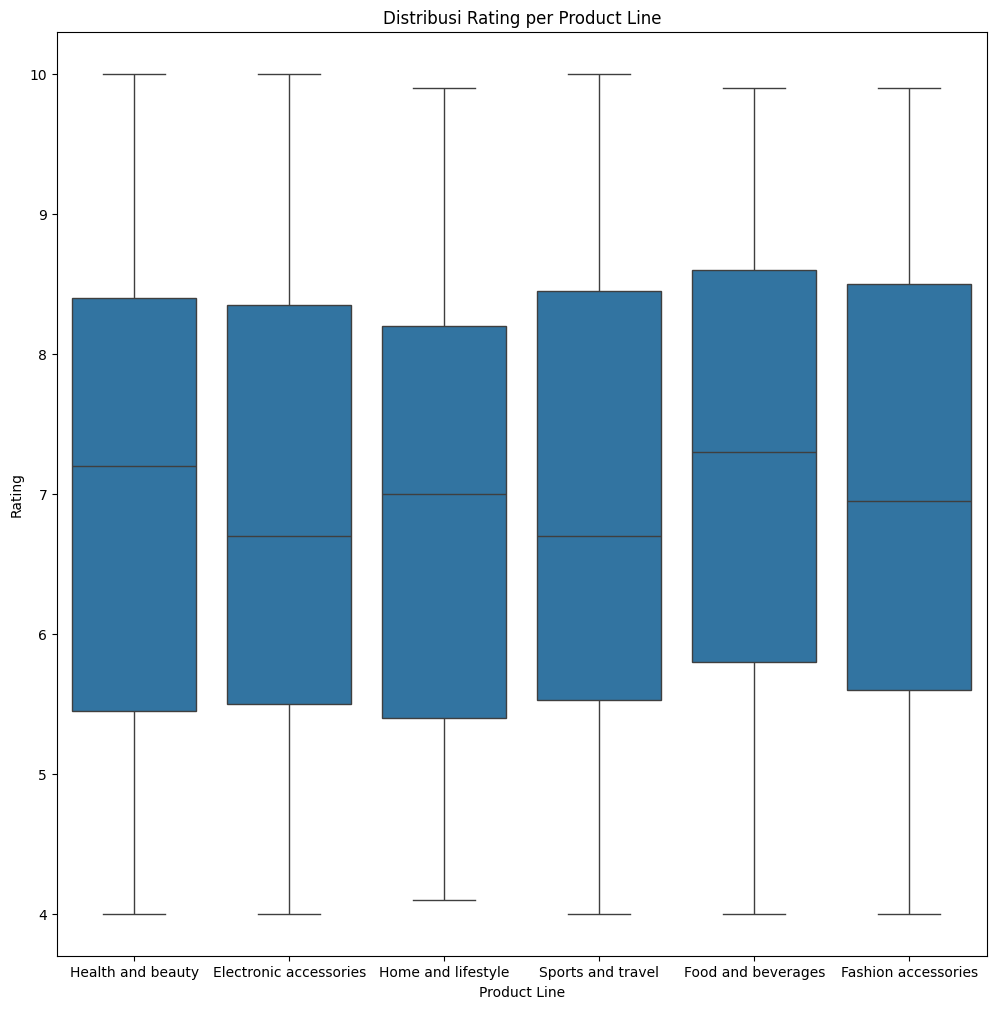

In [70]:
import seaborn as sns


plt.figure(figsize=(12, 12))
sns.boxplot(x='Product line', y='Rating', data=data)


plt.title('Distribusi Rating setiap Product Line')
plt.xlabel('Product Line')
plt.ylabel('Rating')
plt.show()



kita coba melakukan uji statistik sederhana untuk mengetahui apakah ada hubungan antara product line dengan rating.

saya akan  menggunakan uji ANOVA (Analysis of Variance) untuk melihat apakah rata-rata Rating berbeda secara signifikan antara kategori Product line.

In [73]:
import scipy.stats as stats


product_line_groups = [group['Rating'].values for name, group in data.groupby('Product line')]

# Menghitung uji ANOVA
f_stat, p_value = stats.f_oneway(*product_line_groups)

print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 0.539894741980656, P-value: 0.7461368538761987


ternyata tidak ada perbedaan signifika dari data tresebut sehingga kita bisa menganalisa data yang lainnya yang memiliki pengaruh pada penjualan supermarket kita di masa depan

3. Analisis Penjualan dan Profitabilitas

Analisis Total Penjualan berdasarkan Kategori Produk (Product line)

Menghitung total penjualan dan profitabilitas untuk setiap Product line. Ini bisa memberi gambaran tentang produk mana yang lebih menguntungkan atau lebih banyak terjual.

In [74]:
sales_profit_per_product =data.groupby('Product line').agg(
    total_sales=('Total', 'sum'),
    total_profit=('gross income', 'sum')
).sort_values(by='total_sales', ascending=False)

print(sales_profit_per_product)


                        total_sales  total_profit
Product line                                     
Food and beverages         53471.28     2673.5640
Sports and travel          52497.93     2624.8965
Electronic accessories     51750.03     2587.5015
Fashion accessories        51719.90     2585.9950
Home and lifestyle         51297.06     2564.8530
Health and beauty          46851.18     2342.5590


4. Segmentasi Pelanggan Berdasarkan Tipe (Customer Type)

Tujuan: Memahami bagaimana tipe pelanggan (member atau non-member) mempengaruhi penjualan.

Customer type
Member    156403.28
Normal    151184.10
Name: Total, dtype: float64


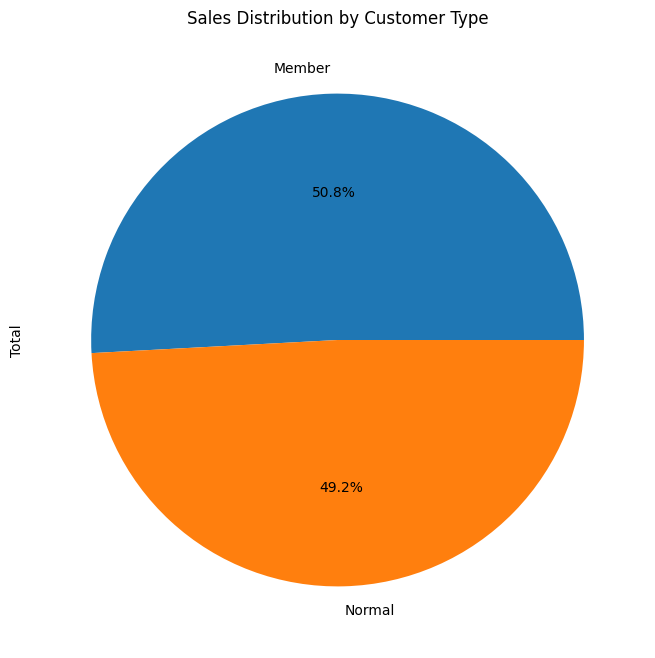

In [86]:
sales_by_customer_type = data.groupby('Customer type')['Total'].sum()
sales_by_customer_type.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title="Sales Distribution by Customer Type")
print(sales_by_customer_type)

kita bisa melihat bahwasannya Dengan perbandingan ini, dapat dilihat bahwa **Member** memiliki total penjualan yang sedikit lebih tinggi dibandingkan dengan **Normal**.

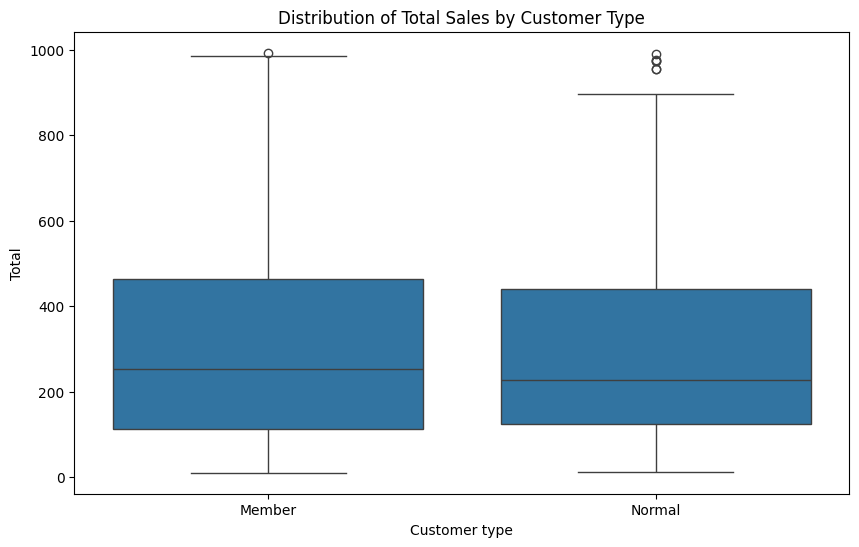

In [87]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='Customer type', y='Total', data=data)
plt.title("Distribution of Total Sales by Customer Type")
plt.show()
